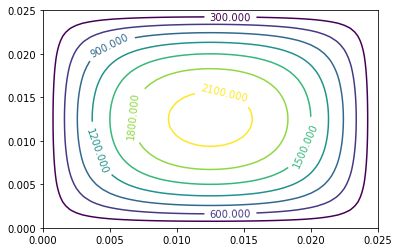

In [25]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import math

def solve(V,d,p):
    e_0 = 8.85*10**(-12)
    Vnew = V
    nx = V.shape[0]
    ny = V.shape[1]
    for y in range(1,ny-1):
        for x in range(1,nx-1):
#            if(x != ny/2 and y != nx/2):
                Vnew[y,x] = 0.25*(V[y,x-1]+V[y,x+1]+V[y-1,x]+V[y+1,x]) + 0.25*d**2*p/e_0
    return Vnew

e_0 = 8.85*10**(-12)
lx = 0.025
ly = 0.025
nx = 50
ny = 50
dx = lx/nx
dy = ly/ny
V = np.zeros(shape=(ny+1,nx+1))


# Initialize arbitrary values
for y in range(1,ny):
    for x in range(1,nx):
        V[y,x] = 10*((x*dx)**2+(y*dy)**2)

# Initialize boundary conditions
for y in range(0,ny+1):
    V[y,0] = 10.
    V[y,nx] = 10.

for x in range(0,nx+1):
    V[0,x] = 10.
    V[ny,x] = 10.

#V[nx/2,ny/2] = 5.
    
for iter in range(5000):
    V = solve(V,dx,12*e_0/(dx*dy))
    
x = np.arange(0, lx+dx, dx)
y = np.arange(0, ly+dy, dy)
X, Y = np.meshgrid(x, y)


CS = pyplot.contour(X, Y, V);
pyplot.clabel(CS, inline=1, fontsize=10);

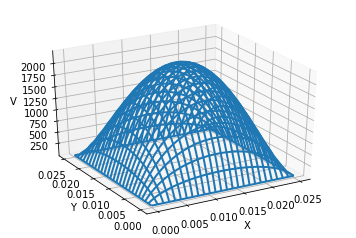

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = pyplot.figure()
ax = fig.gca(projection='3d')

ax.view_init(30, -120)

# ax.set_xlim(0, 0.01)
# ax.set_ylim(0, 0.01)
# ax.set_zlim(0, 12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('V')

#ax.plot_surface(X, Y, V, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=True);
ax.plot_wireframe(X, Y, V,
                       linewidth=2, antialiased=True);

And now with the charge on the square of L = 5cm

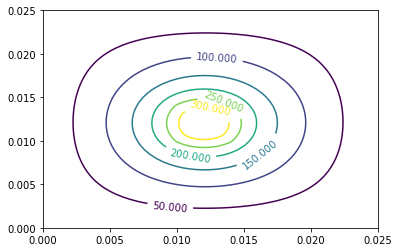

In [33]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import math

def solve(V,L,d,p):
    e_0 = 8.85*10**(-12)
    Vnew = V
    nx = V.shape[0]
    ny = V.shape[1]
    nc = int(L/d)
    cmin = int(nx/2-nc/2)
    cmax = int(nx/2+nc/2)-1
    for y in range(1,ny-1):
        for x in range(1,nx-1):
            if x in range(cmin,cmax) and y in range(cmin,cmax):
                Vnew[y,x] = 0.25*(V[y,x-1]+V[y,x+1]+V[y-1,x]+V[y+1,x]) + 0.25*d**2*p/e_0
            else:
                Vnew[y,x] = 0.25*(V[y,x-1]+V[y,x+1]+V[y-1,x]+V[y+1,x])
    return Vnew

e_0 = 8.85*10**(-12)
lx = 0.025
ly = 0.025
Lx = 0.005
Ly = 0.005
nx = 50
ny = 50
dx = lx/nx
dy = ly/ny
V = np.zeros(shape=(ny+1,nx+1))


# Initialize arbitrary values
for y in range(1,ny):
    for x in range(1,nx):
        V[y,x] = 10*((x*dx)**2+(y*dy)**2)

# Initialize boundary conditions
for y in range(0,ny+1):
    V[y,0] = 10.
    V[y,nx] = 10.

for x in range(0,nx+1):
    V[0,x] = 10.
    V[ny,x] = 10.

#V[nx/2,ny/2] = 5.
    
for iter in range(5000):
    V = solve(V,Lx,dx,12*e_0/(dx*dy))
    
x = np.arange(0, lx+dx, dx)
y = np.arange(0, ly+dy, dy)
X, Y = np.meshgrid(x, y)


CS = pyplot.contour(X, Y, V);
pyplot.clabel(CS, inline=1, fontsize=10);

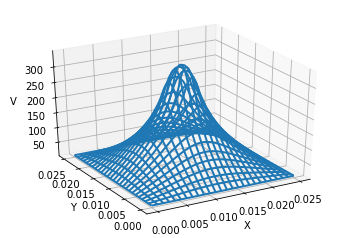

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = pyplot.figure()
ax = fig.gca(projection='3d')

ax.view_init(30, -120)

# ax.set_xlim(0, 0.01)
# ax.set_ylim(0, 0.01)
# ax.set_zlim(0, 12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('V')

#ax.plot_surface(X, Y, V, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=True);
ax.plot_wireframe(X, Y, V,
                       linewidth=2, antialiased=True);